# Random Forest on Anonymized Adult Datasets with k={3,5,10,20,50}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

/var/folders/dw/pfbgqvcn34zbfx6rtv1j5n680000gn/T/ipykernel_81930/3413586779.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def encode(dataframes):
    for df in dataframes:
        age = preprocessing.LabelEncoder().fit(df['age'])
        df['age'] = age.transform(df['age'])

        workclass = preprocessing.LabelEncoder().fit(df['workclass'])
        df['workclass'] = workclass.transform(df['workclass'])

        maritalStatus = preprocessing.LabelEncoder().fit(df['marital-status'])
        df['marital-status'] = maritalStatus.transform(df['marital-status'])

        education = preprocessing.LabelEncoder().fit(df['education'])
        df['education'] = education.transform(df['education'])

        relationship = preprocessing.LabelEncoder().fit(df['relationship'])
        df['relationship'] = relationship.transform(df['relationship'])

        occupation = preprocessing.LabelEncoder().fit(df['occupation'])
        df['occupation'] = occupation.transform(df['occupation'])

        sex = preprocessing.LabelEncoder().fit(df['gender'])
        df['gender'] = sex.transform(df['gender'])

        nc = preprocessing.LabelEncoder().fit(df['native-country'])
        df['native-country'] = nc.transform(df['native-country'])

        income = preprocessing.LabelEncoder().fit(df['income'])
        df['income'] = income.transform(df['income'])

In [3]:
def read_csvs(anonymizer):
    dataframes = []
    for i in [3,5,10,20,50]:
        dataframes.append(pd.read_csv("MiniAdult/MiniAdultDatasets/" + anonymizer + "_" + str(i) + ".csv"))
    return dataframes

In [4]:
# Define variables to store results
all_acc = {}
avg_acc_for_anonymizer = {}
avg_acc_for_k = {}

## Read datasets randomized with random anonymizer

In [5]:
# Read randomized datasets for random anonymization
dataframes = read_csvs("random")

In [6]:
encode(dataframes)

In [7]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("Random Forest Classifier on Mini Adult Dataset")
for df in dataframes:
    print("RF on Random Anonymized Adult Dataset with k = " + str(k[i]))
    X = df[['age', 'education', 'relationship', 'occupation', 'gender', 'native-country']].values
    y = df['income'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # Random Forest Classifier on Mini Adult Dataset
    rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
    grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
    grid_clf.fit(X_train, y_train)

    
    rf = grid_clf.best_estimator_
    acc = rf.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1

all_acc["Random"] = accuracy
avg_acc_for_anonymizer["Random"] = np.mean(list(accuracy.values()))


Random Forest Classifier on Mini Adult Dataset
RF on Random Anonymized Adult Dataset with k = 3
Accuracy on test set: 0.77
RF on Random Anonymized Adult Dataset with k = 5
Accuracy on test set: 0.77
RF on Random Anonymized Adult Dataset with k = 10
Accuracy on test set: 0.77
RF on Random Anonymized Adult Dataset with k = 20
Accuracy on test set: 0.77
RF on Random Anonymized Adult Dataset with k = 50
Accuracy on test set: 0.77


## Read datasets randomized with clustering randomizer

In [8]:
dataframes = read_csvs("clustering")

In [9]:
encode(dataframes)

In [10]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("Random Forest Classifier on Mini Adult Dataset")
for df in dataframes:
    print("RF on Clustering Based Anonymized Adult Dataset with k = " + str(k[i]))
    X = df[['age', 'education', 'relationship', 'occupation', 'gender', 'native-country']].values
    y = df['income'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # Random Forest Classifier on Mini Adult Dataset
    rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
    grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
    grid_clf.fit(X_train, y_train)

    
    rf = grid_clf.best_estimator_
    acc = rf.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1
all_acc["Clustering"] = accuracy
avg_acc_for_anonymizer["Clustering"] = np.mean(list(accuracy.values()))

Random Forest Classifier on Mini Adult Dataset
RF on Clustering Based Anonymized Adult Dataset with k = 3
Accuracy on test set: 0.8
RF on Clustering Based Anonymized Adult Dataset with k = 5
Accuracy on test set: 0.81
RF on Clustering Based Anonymized Adult Dataset with k = 10
Accuracy on test set: 0.74
RF on Clustering Based Anonymized Adult Dataset with k = 20
Accuracy on test set: 0.77
RF on Clustering Based Anonymized Adult Dataset with k = 50
Accuracy on test set: 0.78


## Read datasets randomized with topdown anonymizer

In [11]:
dataframes = read_csvs("topdown")

In [12]:
encode(dataframes)

In [13]:
k = [3,5,10,20,50]
i = 0
accuracy = {}
print("Random Forest Classifier on Mini Adult Dataset")
for df in dataframes:
    print("RF on Top-down Based Anonymized Adult Dataset with k = " + str(k[i]))
    X = df[['age', 'education', 'relationship', 'occupation', 'gender', 'native-country']].values
    y = df['income'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

    # Random Forest Classifier on Mini Adult Dataset
    rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
    grid_clf = GridSearchCV(rf, param_grid, cv=5, refit=True)
    grid_clf.fit(X_train, y_train)

    
    rf = grid_clf.best_estimator_
    acc = rf.score(X_test, y_test)

    print("Accuracy on test set: " + str(acc))
    accuracy[k[i]] = acc
    i += 1
all_acc["Top-down"] = accuracy
avg_acc_for_anonymizer["Top-down"] = np.mean(list(accuracy.values()))

Random Forest Classifier on Mini Adult Dataset
RF on Top-down Based Anonymized Adult Dataset with k = 3
Accuracy on test set: 0.9
RF on Top-down Based Anonymized Adult Dataset with k = 5
Accuracy on test set: 0.9
RF on Top-down Based Anonymized Adult Dataset with k = 10
Accuracy on test set: 0.77
RF on Top-down Based Anonymized Adult Dataset with k = 20
Accuracy on test set: 0.76
RF on Top-down Based Anonymized Adult Dataset with k = 50
Accuracy on test set: 0.86


## Plotting

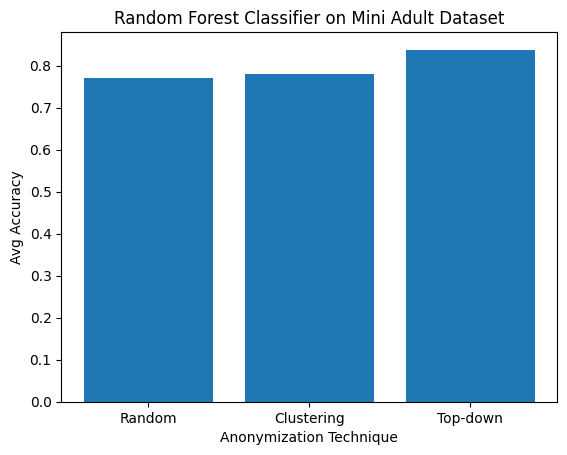

In [14]:
# Plot random forest avg accuracy for different anonymization techniques
plt.bar(range(len(avg_acc_for_anonymizer)), list(avg_acc_for_anonymizer.values()), align='center')
plt.xticks(range(len(avg_acc_for_anonymizer)), list(avg_acc_for_anonymizer.keys()))
plt.title("Random Forest Classifier on Mini Adult Dataset")
plt.xlabel("Anonymization Technique")
plt.ylabel("Avg Accuracy")
plt.savefig("Figures/rf_avg_acc_3_anonymization_techniques.png")
plt.show()

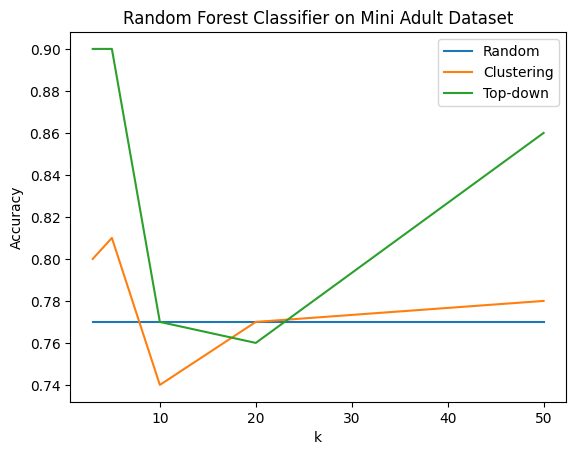

In [15]:
# Plot random forest accuracy for different k values for each anonymization technique
plt.plot(k, list(all_acc["Random"].values()), label="Random")
plt.plot(k, list(all_acc["Clustering"].values()), label="Clustering")
plt.plot(k, list(all_acc["Top-down"].values()), label="Top-down")
plt.title("Random Forest Classifier on Mini Adult Dataset")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Figures/rf_acc_for_different_k.png")
plt.show() 

## Save Results

In [16]:
# save results to csv
results = pd.DataFrame(all_acc)
results.to_csv("MiniAdult/rf_results.csv", index=False)

In [17]:
results

,Random,Clustering,Top-down
3,0.77,0.80,0.90
5,0.77,0.81,0.90
10,0.77,0.74,0.77
20,0.77,0.77,0.76
50,0.77,0.78,0.86
